In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load the dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.drop("RestingECG", axis=1, inplace=True)

In [15]:
# data cleaning
print(df.isnull().sum()/len(df) * 100)
print(f"duplicated rows are {df.duplicated().sum()} rows")
# remove duplicated rows
df.drop_duplicates(inplace=True)


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
duplicated rows are 0 rows


## EDA

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,122,N,0.0,Up,0


In [18]:
def check(value):
    if value < 90:
        return "low"
    elif value < 140 :
        return "normal"
    elif value >= 140 :
        return "high"
    
df["Bp_level"] = df["RestingBP"].apply(check)

<Axes: xlabel='Bp_level'>

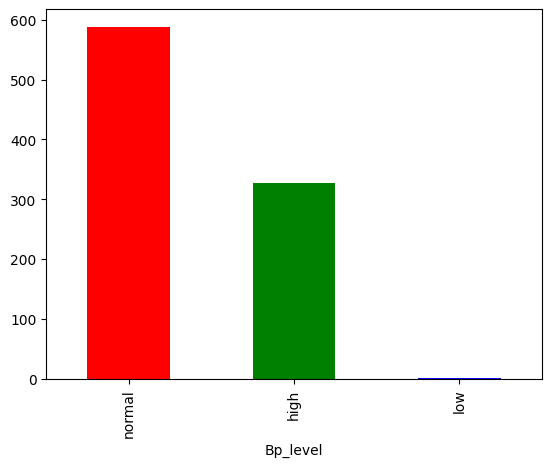

In [20]:
df["Bp_level"].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])

<Axes: xlabel='Bp_level'>

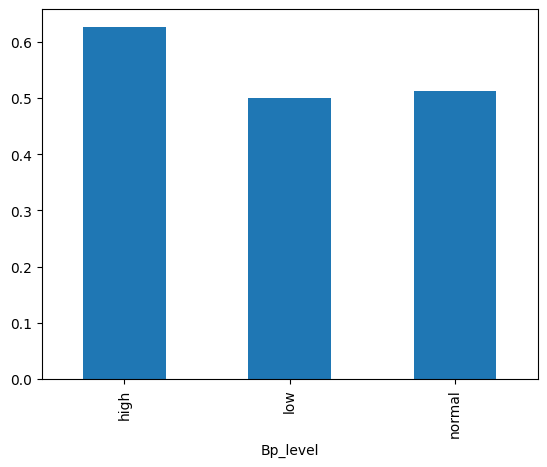

In [ ]:
df.groupby("Bp_level")["HeartDisease"].

In [25]:
# Count of HeartDisease in each BP level
bp_hd_counts = df.groupby("Bp_level")["HeartDisease"].value_counts().unstack()

# Show the result
print(bp_hd_counts)


HeartDisease    0    1
Bp_level              
high          122  205
low             1    1
normal        287  301


In [ ]:
# value counts for categorical features
for col in ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']:
    print(f"{col} value counts:\n{df[col].value_counts()}\n")


Sex value counts:
Sex
M    724
F    193
Name: count, dtype: int64

ChestPainType value counts:
ChestPainType
ASY    495
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

FastingBS value counts:
FastingBS
0    704
1    213
Name: count, dtype: int64

ExerciseAngina value counts:
ExerciseAngina
N    547
Y    370
Name: count, dtype: int64

ST_Slope value counts:
ST_Slope
Flat    459
Up      395
Down     63
Name: count, dtype: int64

HeartDisease value counts:
HeartDisease
1    507
0    410
Name: count, dtype: int64



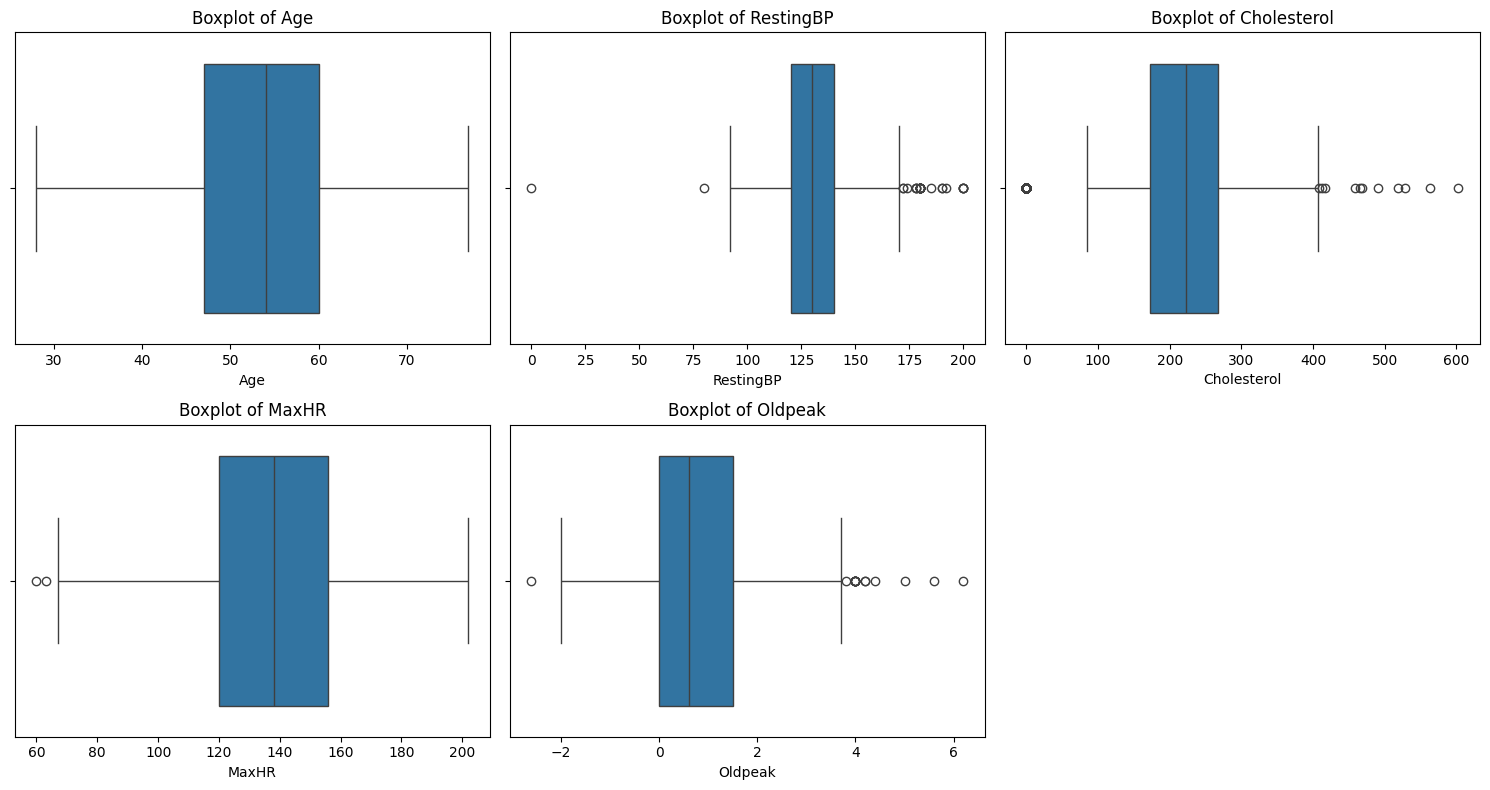

In [ ]:
# Check outliers using boxplots

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


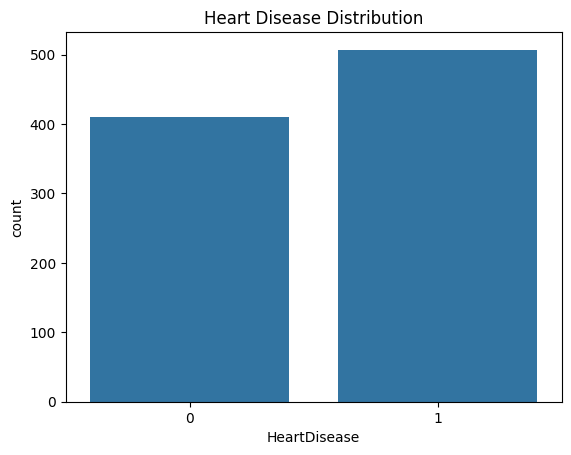

In [28]:
sns.countplot(data=df, x='HeartDisease')
plt.title('Heart Disease Distribution')
plt.show()


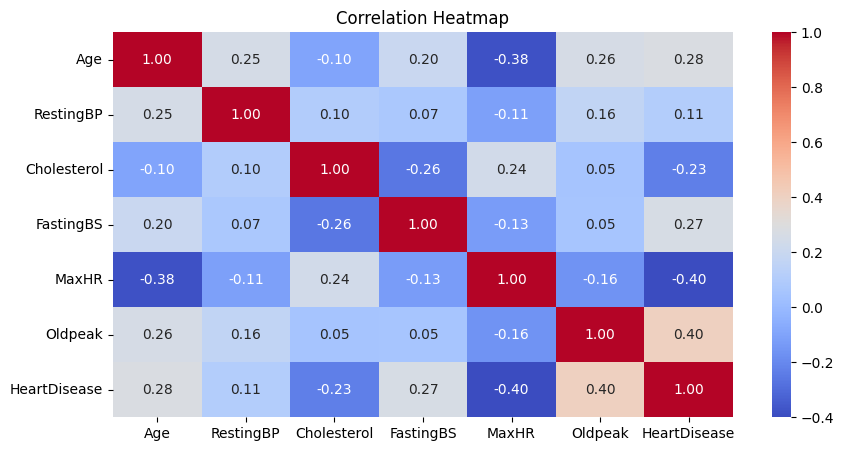

In [32]:
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


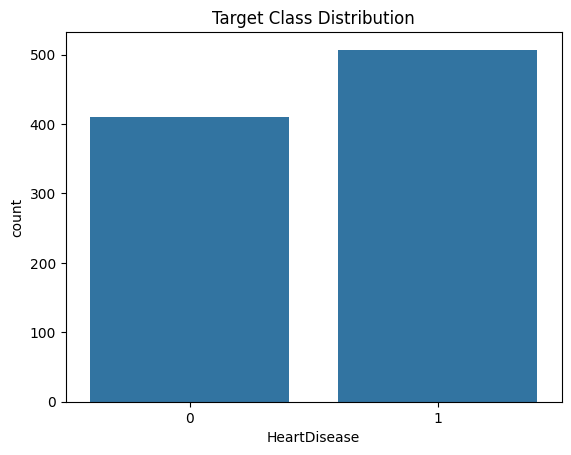

In [33]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Target Class Distribution")
plt.show()


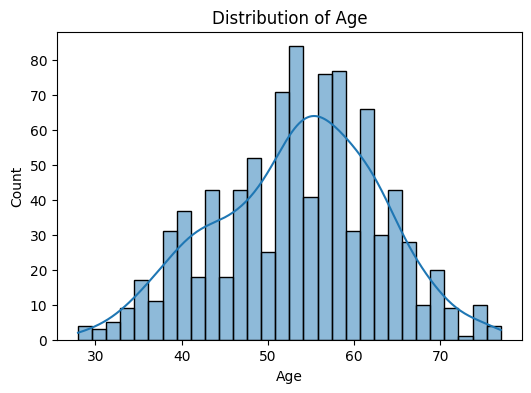

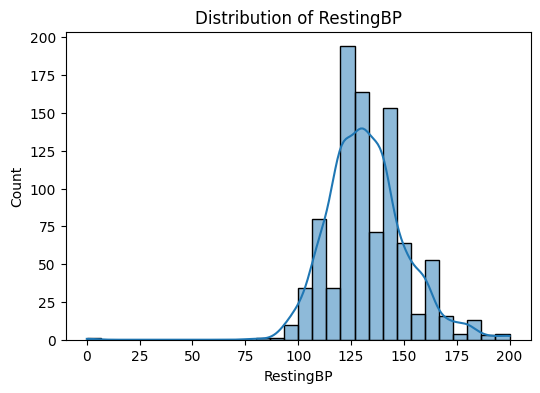

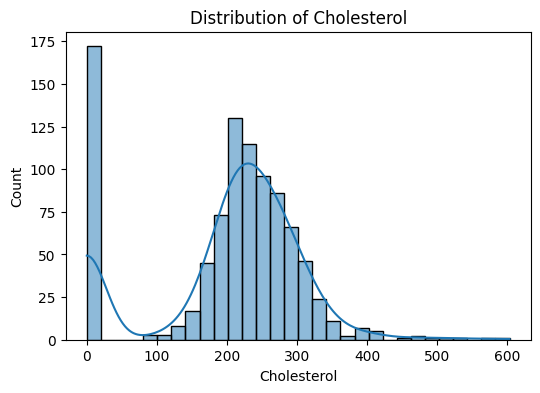

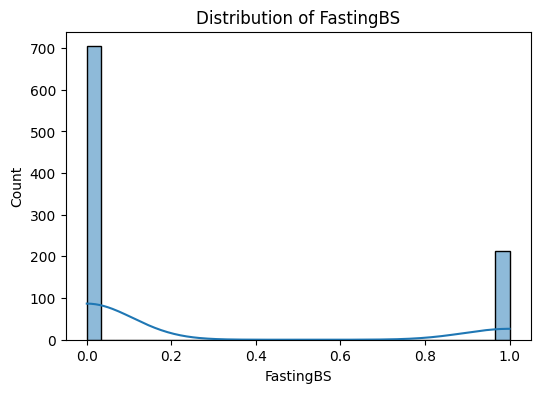

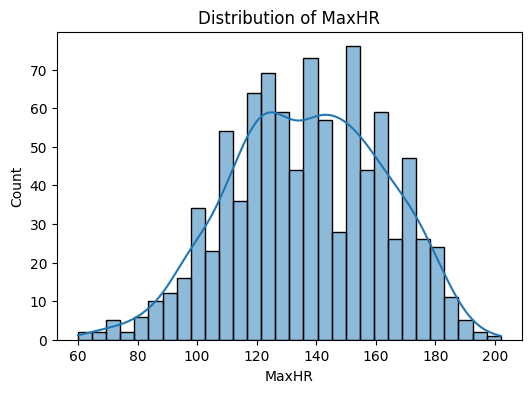

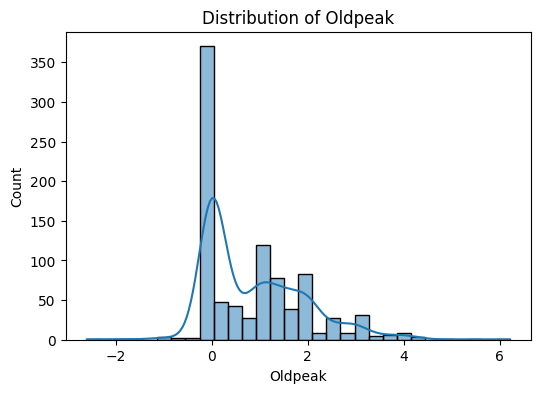

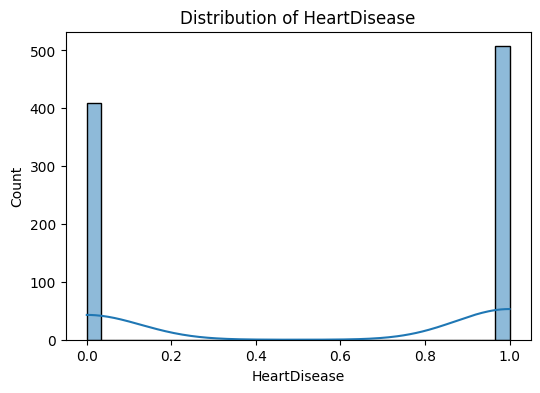

In [34]:
# visualize the distribution of numerical features
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


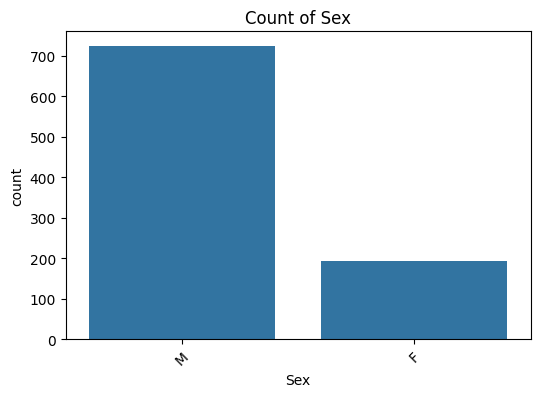

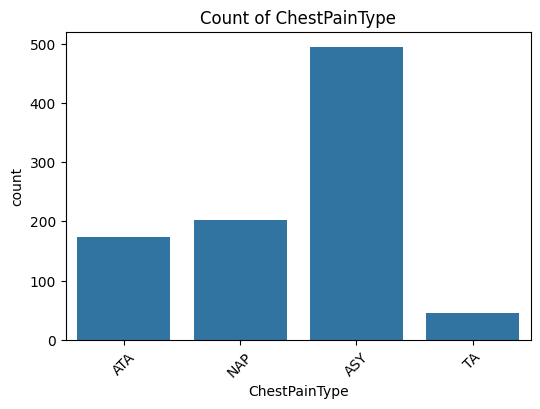

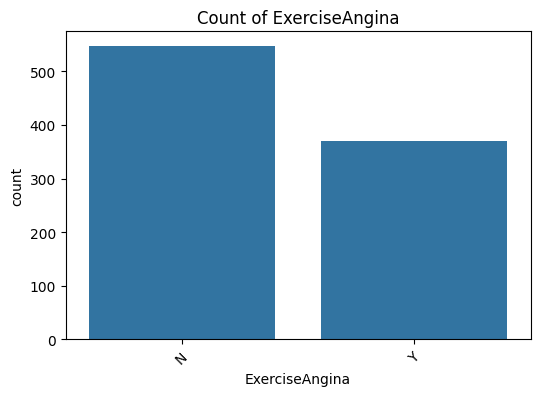

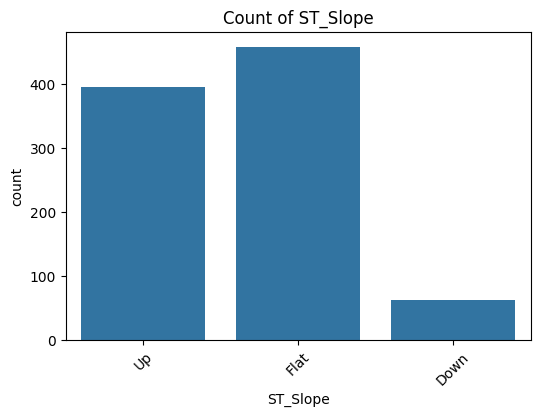

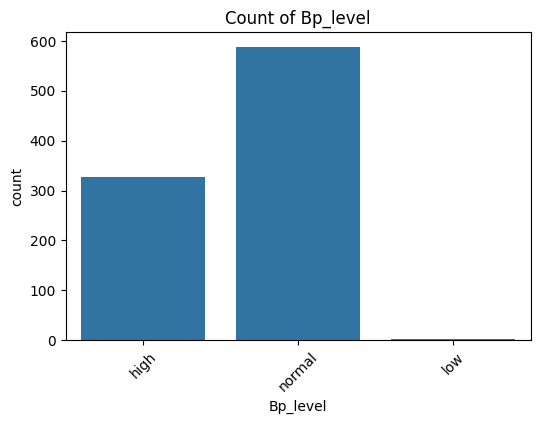

In [35]:
# categorical features visualization
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


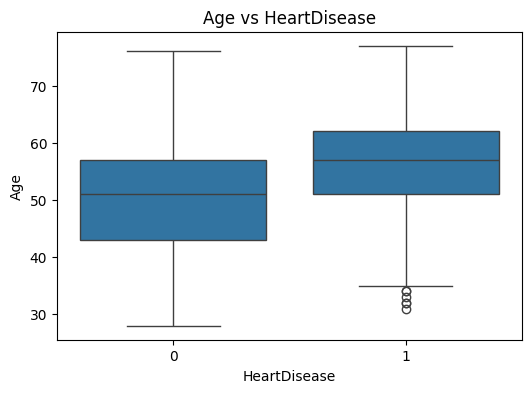

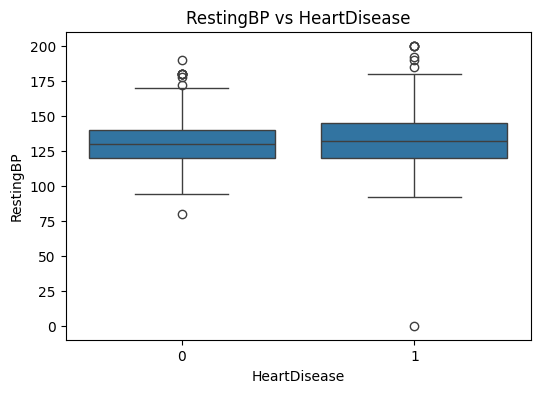

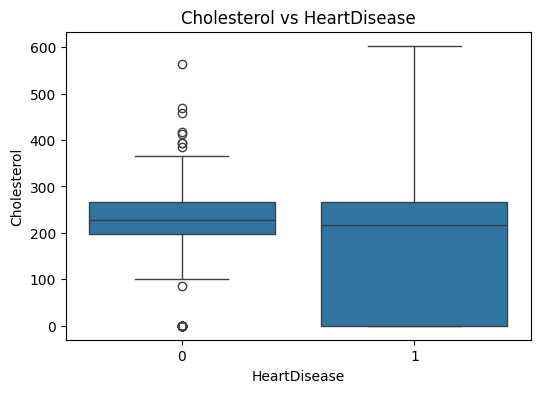

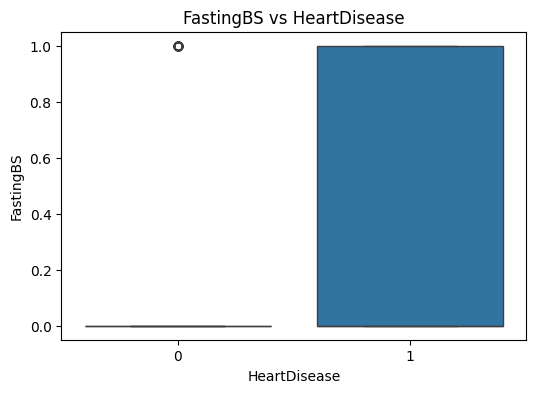

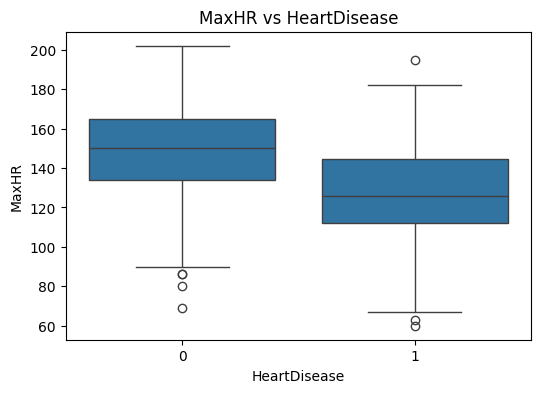

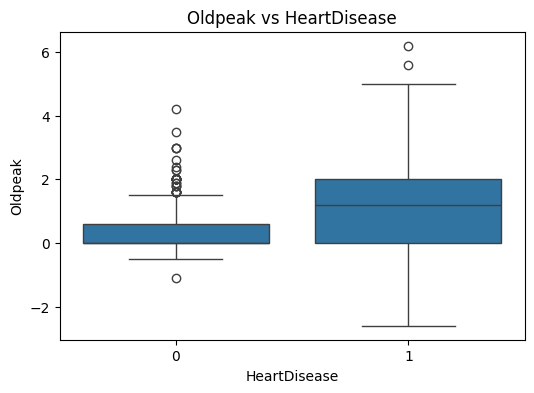

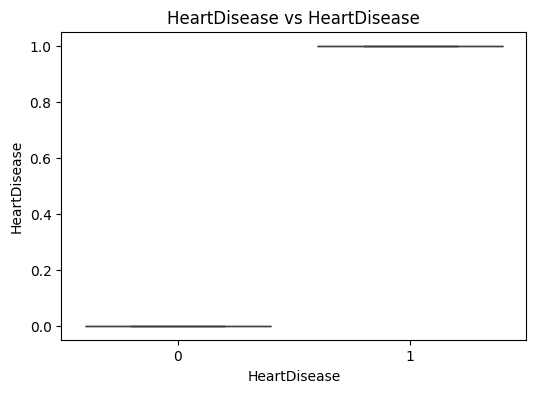

In [36]:
# Numerical vs Target
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f"{col} vs HeartDisease")
    plt.show()


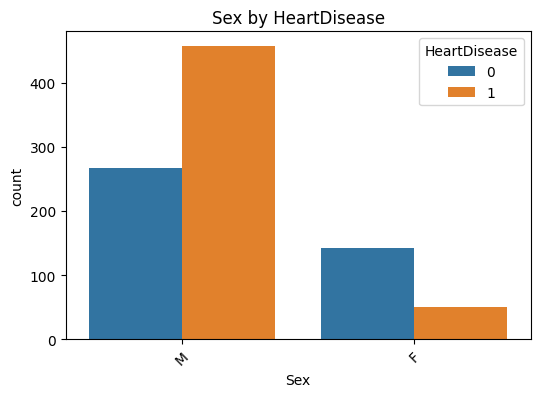

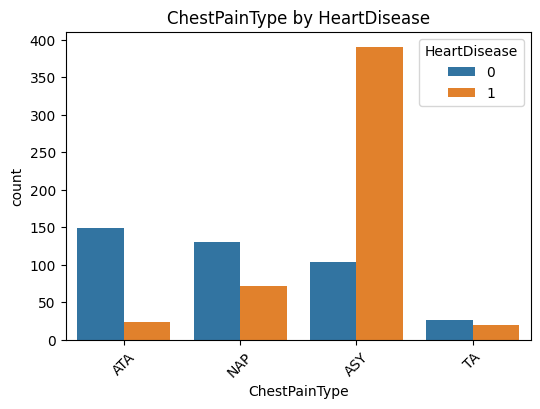

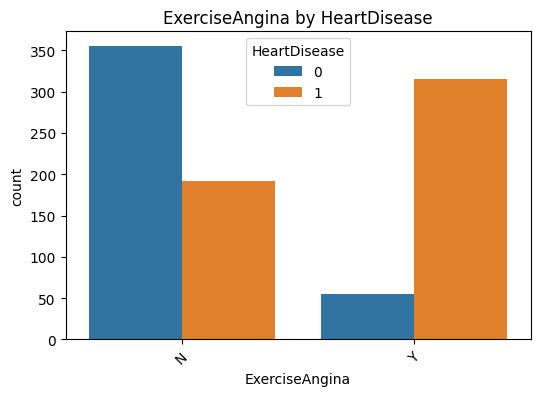

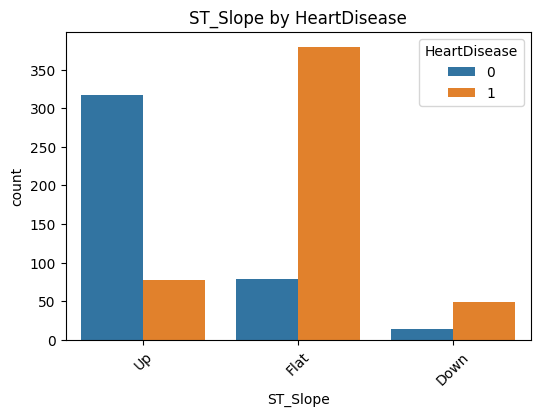

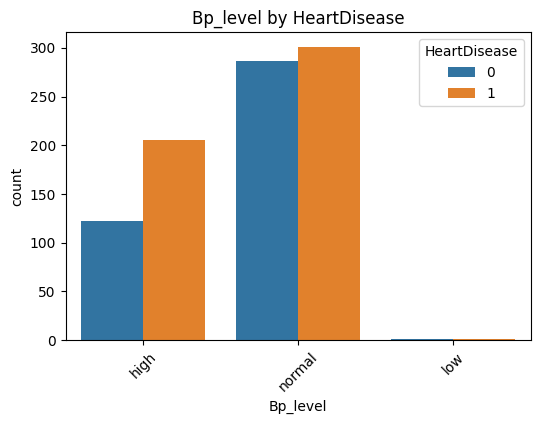

In [37]:
# Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f"{col} by HeartDisease")
    plt.xticks(rotation=45)
    plt.show()


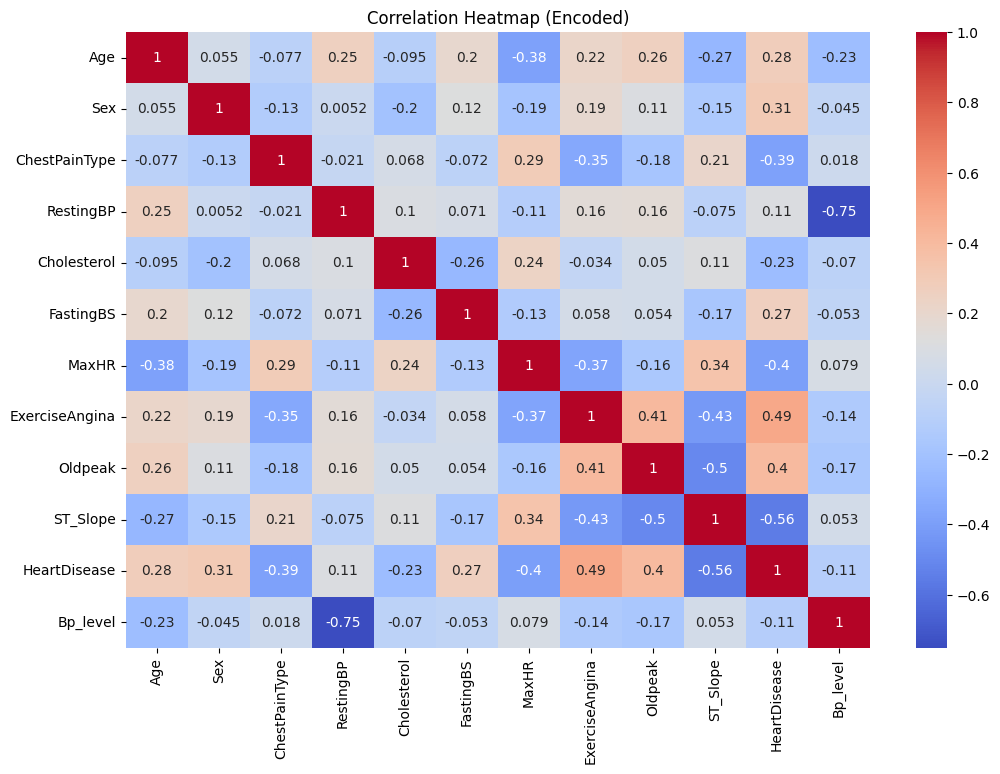

In [38]:
# correlation with target variable
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Now calculate correlation again
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Encoded)")
plt.show()


In [39]:
## Outliers removal
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [40]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Bp_level
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,high
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1,high
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,normal
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1,normal
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,high


In [42]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'Bp_level'],
      dtype='object')

In [41]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Bp_level           object
dtype: object

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Encode binary/ordinal columns using LabelEncoder
label_cols = ['Sex', 'ExerciseAngina', 'Bp_level']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# 2. One-Hot Encode nominal multiclass columns
df = pd.get_dummies(df, columns=['ChestPainType', 'ST_Slope'], drop_first=True)

# DONE! Your data is now encoded and ready (without scaling)


In [49]:
df.to_excel('encoded_heart_disease_data.xlsx', index=False)

In [45]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Bp_level,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,0,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,1,True,False,False,False,True
3,48,0,138,214,0,108,1,1.5,1,1,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,0,False,True,False,False,True


In [48]:
from sklearn.preprocessing import StandardScaler
# Step 1: Separate features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Step 2: Identify numeric columns
numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Step 3: Standard scaling
scaler = StandardScaler()
scaler.fit(X[numeric_cols])
scaled_data = scaler.transform(X[numeric_cols])
X[numeric_cols] = scaled_data

# Step 4: Preview
print(X.head())


        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.229528    1   0.632098     0.985008          0  1.253708               0   
1 -0.285576    0   1.945663    -1.165089          0  0.590478               0   
2 -1.544179    1  -0.024685     0.866654          0 -1.813732               0   
3 -0.390459    0   0.500741    -0.494416          0 -1.399213               1   
4  0.238842    1   1.288880    -0.869204          0 -0.818886               0   

    Oldpeak  Bp_level  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0 -0.834846         0               True              False             False   
1  0.205836         0              False               True             False   
2 -0.834846         1               True              False             False   
3  0.726176         1              False              False             False   
4 -0.834846         0              False               True             False   

   ST_Slope_Flat  ST_Slope

In [50]:
from sklearn.model_selection import train_test_split

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8983050847457628
Confusion Matrix:
 [[64  4]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        68
           1       0.91      0.84      0.88        50

    accuracy                           0.90       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.90      0.90       118



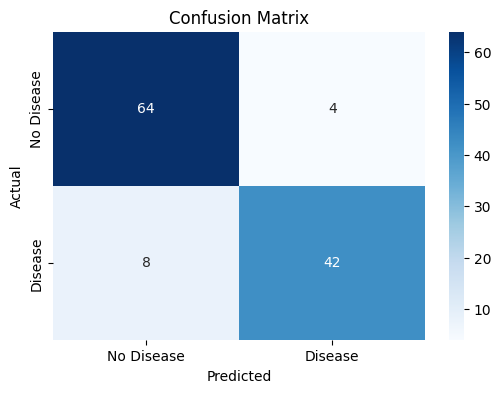

In [53]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
import joblib

# Save model to a file
joblib.dump(model, "logistic_heart_model.pkl")

# To load later: model = joblib.load("logistic_heart_model.pkl")


['logistic_heart_model.pkl']

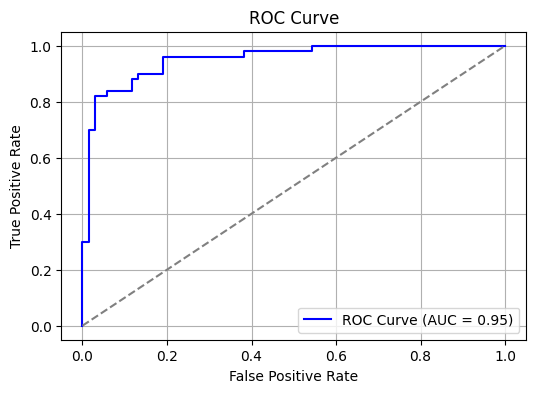

In [55]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (for the positive class)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [58]:
def predict_heart_disease(new_data_dict, scaler, model):
   

    # Define all columns in the correct order (must match training X)
    column_order = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS',
                    'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Bp_level',
                    'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                    'ST_Slope_Flat', 'ST_Slope_Up']
    
    # Convert input dict to DataFrame
    new_df = pd.DataFrame([new_data_dict], columns=column_order)
    
    # Identify numeric columns to scale
    numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
    
    # Scale numeric features using the already fitted scaler
    new_df[numeric_cols] = scaler.transform(new_df[numeric_cols])
    
    # Predict probability and class
    prediction = model.predict(new_df)[0]
    probability = model.predict_proba(new_df)[0][1]

    # Display result
    result = "Heart Disease Detected" if prediction == 1 else "No Heart Disease"
    print(f" Prediction: {result}")
    print(f" Probability of Heart Disease: {probability:.2f}")
